# Booking Data Analysis - Feature Selection

**Student Name:** Anton

**Group Project Assignment**  

**Date:** 26-10-2025

## Introduction

For this assignment, I analyzed a booking dataset to understand which features (columns) are suitable for analysis and which ones should be excluded. I followed the same methodology demonstrated in the Iris classification notebook, where features were carefully selected based on their usefulness.

In the Iris example, they started with 4 features but only used 2 (Petal Length and Petal Width) because these showed the best separation between species. Similarly, I will evaluate all 23 features in my booking dataset and decide which ones to keep or exclude based on data quality and analytical value.

## 📚 Setup - Library Imports

First, I imported the necessary libraries and checked their versions for reproducibility, just like in the Iris example.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

print("I'm using the following library versions:")
print("="*60)
print(f"pandas: {pd.__version__}")
print(f"numpy: {np.__version__}")
print(f"matplotlib: {plt.matplotlib.__version__}")
print(f"seaborn: {sns.__version__}")

I'm using the following library versions:
pandas: 2.3.2
numpy: 2.3.2
matplotlib: 3.10.6
seaborn: 0.13.2


## 📦 Loading My Dataset

I loaded my booking dataset from an Excel file. I made sure to use a raw string (r'...') to avoid issues with Windows file paths.

In [2]:
file_path = r'C:\Users\Anton\Downloads\Grip export booking freeze 1 wk-fontys.xlsx'
# Load the dataset
print(f"Loading my data from: {file_path}")
print("="*80)

try:
    df = pd.read_excel(file_path)
    print(f"✓ Success! I loaded the dataset.")
    print(f"\nMy dataset has {df.shape[0]:,} rows and {df.shape[1]} columns.")
    print(f"This means I have {df.shape[1]} features (columns) to analyze.")
except FileNotFoundError:
    print("❌ Error: File not found!")
    print("Please check:")
    print("  1. The file path is correct")
    print("  2. The file exists in that location")
    print("  3. You're using the correct format (raw string with r'...')")
except Exception as e:
    print(f"❌ Error loading file: {e}")

Loading my data from: C:\Users\Anton\Downloads\Grip export booking freeze 1 wk-fontys.xlsx
✓ Success! I loaded the dataset.

My dataset has 26,870 rows and 23 columns.
This means I have 23 features (columns) to analyze.


## 🔍 Initial Exploration

Just like the Iris notebook showed a sample of the data first, I'll do the same to get familiar with my dataset.

In [3]:
# I want to see the basic structure of my data
print("Basic information about my dataset:")
print("="*80)
df.info()

Basic information about my dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26870 entries, 0 to 26869
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   rapportageweek            26870 non-null  int64         
 1   nw boekjaar               26870 non-null  int64         
 2   CATEGORIE                 26868 non-null  object        
 3   VERTREKMAAND              26870 non-null  int64         
 4   BOEKJAAR                  26870 non-null  object        
 5   OMZET                     26870 non-null  float64       
 6   boekingsnummer            26870 non-null  int64         
 7   registratiedatum          26870 non-null  datetime64[ns]
 8   startdatum                26870 non-null  datetime64[ns]
 9   boekingsbedrag            26870 non-null  float64       
 10  land                      23960 non-null  object        
 11  elementtype               26865 non-null  ob

In [4]:
# I'll look at a random sample of 10 rows to understand the data better
print("Here's a random sample of 10 bookings from my dataset:")
print("="*80)
df.sample(10)

Here's a random sample of 10 bookings from my dataset:


,rapportageweek,nw boekjaar,CATEGORIE,VERTREKMAAND,BOEKJAAR,OMZET,boekingsnummer,registratiedatum,startdatum,boekingsbedrag,...,aantal_deelnemers,boekingsstatus,wederverkoper_naam,wederverkopergroep_naam,Korting verkoopbedrag,einddatum,land_herkomst_klant,debiteurnummer,boekingstype_elementcode,def_datum
20594,251005,2025,BOEKING,202511,FY25,4468.0,25006743,2025-03-23 12:40:13,2025-11-27,4520.5,...,2,DEF,Sawadee direct,Sawadee,0.0,2025-12-13,Nederland,3183084.0,JRMEX,2025-03-25
10715,251005,2025,BOEKING,202507,FY25,3441.0,25000722,2025-01-07 13:48:17,2025-07-19,3473.5,...,1,DEF,Sawadee direct,Sawadee,-100.0,2025-08-08,Nederland,3145685.0,INK,2025-01-31
1849,251005,2024,NIET,202410,FY24,0.0,24055897,2024-05-06 00:00:00,2024-10-13,0.0,...,1,RISS,Sawadee direct,Sawadee,0.0,2024-10-28,Nederland,3143541.0,OUDE_BOEKING,NaT
24473,251005,2025,NIET,202510,FY25,0.0,25014205,2025-08-18 12:46:40,2025-10-21,0.0,...,1,VERV,Sawadee direct,Sawadee,0.0,2025-11-09,Nederland,3187124.0,JRKET,NaT
14113,251005,2025,BOEKING,202505,FY25,1748.0,25005181,2025-02-25 21:40:59,2025-05-04,1782.5,...,1,DEF,Sawadee direct,Sawadee,0.0,2025-05-18,Nederland,3172741.0,MRH,2025-03-13
7828,251005,2025,BOEKING,202507,FY25,6346.0,24127513,2024-11-20 14:26:15,2025-07-29,6418.5,...,4,DEF,Sawadee direct,Sawadee,-450.0,2025-08-12,Nederland,3117197.0,MKF,2024-11-21
26202,251005,2026,OPTIE,202603,FY26,5049.0,25016256,2025-09-24 12:52:11,2026-03-11,5081.5,...,1,OPTIE_GG_POG1,Sawadee direct,Sawadee,0.0,2026-03-31,Nederland,3188396.0,JPN12,NaT
14374,251005,2025,BOEKING,202509,FY25,2571.0,25005580,2025-03-05 11:44:52,2025-09-13,2603.5,...,1,DEF,Sawadee direct,Sawadee,-100.0,2025-09-29,Nederland,3182486.0,JRIBL,2025-03-12
6603,251005,2025,NIET,202507,FY25,0.0,24126151,2024-10-30 15:25:10,2025-07-11,0.0,...,2,VERV,Sawadee direct,Sawadee,0.0,2025-07-31,Nederland,3177291.0,SMT,NaT
21012,251005,2025,NIET,202511,FY25,1089.3,25008104,2025-04-15 15:38:39,2025-11-29,1089.3,...,2,GEANNULEERD_KLANT,Sawadee direct,Sawadee,0.0,NaT,België,3183776.0,THN,2025-05-01


In [ ]:
# I want to see all the feature names clearly
print("\nAll the features (columns) I need to analyze:")
print("="*80)
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")
    
print(f"\nTotal features to evaluate: {len(df.columns)}")


All the features (columns) I need to analyze:
 1. rapportageweek
 2. nw boekjaar
 3. CATEGORIE
 4. VERTREKMAAND
 5. BOEKJAAR
 6. OMZET
 7. boekingsnummer
 8. registratiedatum
 9. startdatum
10. boekingsbedrag
11. land
12. elementtype
13. elementnaam
14. aantal_deelnemers
15. boekingsstatus
16. wederverkoper_naam
17. wederverkopergroep_naam
18. Korting verkoopbedrag
19. einddatum
20. land_herkomst_klant
21. debiteurnummer
22. boekingstype_elementcode
23. def_datum

Total features to evaluate: 23


## 📊 Understanding My Features

Since many of my column names are in Dutch, I created a translation table to understand what each feature means. This is similar to how the Iris example explained what sepal and petal measurements represent.

In [6]:
# I translated each Dutch column name to English to better understand my data
feature_descriptions = {
    'rapportageweek': 'Reporting Week - Week number for the reporting period',
    'nw boekjaar': 'New Fiscal Year - Fiscal year indicator',
    'CATEGORIE': 'Category - Type of booking (BOEKING/OPTIE/NIET)',
    'VERTREKMAAND': 'Departure Month - Month of departure',
    'BOEKJAAR': 'Fiscal Year - Fiscal year code (FY24, FY25, FY26)',
    'OMZET': 'Revenue - Revenue/turnover amount in euros',
    'boekingsnummer': 'Booking Number - Unique booking identifier',
    'registratiedatum': 'Registration Date - Date when booking was registered',
    'startdatum': 'Start Date - Trip start date',
    'boekingsbedrag': 'Booking Amount - Amount paid for booking in euros',
    'land': 'Country - Destination country',
    'elementtype': 'Element Type - Type of travel element',
    'elementnaam': 'Element Name - Name of travel element/package',
    'aantal_deelnemers': 'Number of Participants - Participant count',
    'boekingsstatus': 'Booking Status - Current status of booking',
    'wederverkoper_naam': 'Reseller Name - Name of the reseller',
    'wederverkopergroep_naam': 'Reseller Group - Reseller group name',
    'Korting verkoopbedrag': 'Discount Amount - Discount on sales price in euros',
    'einddatum': 'End Date - Trip end date',
    'land_herkomst_klant': 'Customer Origin - Customer\'s country of origin',
    'debiteurnummer': 'Debtor Number - Customer/debtor ID number',
    'boekingstype_elementcode': 'Booking Type Code - Code for booking type',
    'def_datum': 'Definition Date - Definition/confirmation date'
}

# I created a table with descriptions for each feature
feature_info_list = []
for col in df.columns:
    feature_info_list.append({
        'Feature (Dutch)': col,
        'Description (English)': feature_descriptions.get(col, 'Unknown'),
        'Data Type': str(df[col].dtype),
        'Example Value': str(df[col].iloc[0]) if len(df) > 0 else 'N/A'
    })

feature_info_df = pd.DataFrame(feature_info_list)
print("\nMy feature descriptions:")
print("="*120)
feature_info_df


My feature descriptions:


,Feature (Dutch),Description (English),Data Type,Example Value
0,rapportageweek,Reporting Week - Week number for the reporting...,int64,251005
1,nw boekjaar,New Fiscal Year - Fiscal year indicator,int64,2025
2,CATEGORIE,Category - Type of booking (BOEKING/OPTIE/NIET),object,BOEKING
3,VERTREKMAAND,Departure Month - Month of departure,int64,202501
4,BOEKJAAR,"Fiscal Year - Fiscal year code (FY24, FY25, FY26)",object,FY25
5,OMZET,Revenue - Revenue/turnover amount in euros,float64,5279.0
6,boekingsnummer,Booking Number - Unique booking identifier,int64,24000196
7,registratiedatum,Registration Date - Date when booking was regi...,datetime64[ns],2024-03-08 00:00:00
8,startdatum,Start Date - Trip start date,datetime64[ns],2025-01-06 00:00:00
9,boekingsbedrag,Booking Amount - Amount paid for booking in euros,float64,5319.5


## 🎯 Evaluating Feature Quality

Following the Iris example's approach to feature selection, I evaluated each feature based on three main criteria:
1. **Completeness** - How much data is missing?
2. **Variance** - Does the feature have different values or is it constant?
3. **Cardinality** - How many unique values does it have?

Just like the Iris example used box plots to evaluate features, I used these metrics to determine which features are useful.

In [7]:
# I created a comprehensive quality assessment for each feature
print("Analyzing the quality of each feature in my dataset...")
print("="*80)

quality_assessment = []

for col in df.columns:
    total_count = len(df)
    non_null_count = df[col].count()
    null_count = df[col].isnull().sum()
    null_percentage = (null_count / total_count) * 100
    unique_count = df[col].nunique()
    cardinality_ratio = (unique_count / non_null_count * 100) if non_null_count > 0 else 0
    
    quality_assessment.append({
        'Feature': col,
        'Type': str(df[col].dtype),
        'Non-Null': non_null_count,
        'Missing': null_count,
        'Missing %': round(null_percentage, 2),
        'Unique Values': unique_count,
        'Cardinality %': round(cardinality_ratio, 2),
        'Completeness': f"{100 - null_percentage:.1f}%"
    })

quality_df = pd.DataFrame(quality_assessment)
print("\nHere's my quality assessment for all features:")
quality_df

Analyzing the quality of each feature in my dataset...

Here's my quality assessment for all features:


,Feature,Type,Non-Null,Missing,Missing %,Unique Values,Cardinality %,Completeness
0,rapportageweek,int64,26870,0,0.00,1,0.00,100.0%
1,nw boekjaar,int64,26870,0,0.00,4,0.01,100.0%
2,CATEGORIE,object,26868,2,0.01,3,0.01,100.0%
3,VERTREKMAAND,int64,26870,0,0.00,29,0.11,100.0%
4,BOEKJAAR,object,26870,0,0.00,4,0.01,100.0%
5,OMZET,float64,26870,0,0.00,5263,19.59,100.0%
6,boekingsnummer,int64,26870,0,0.00,26870,100.00,100.0%
7,registratiedatum,datetime64[ns],26870,0,0.00,22533,83.86,100.0%
8,startdatum,datetime64[ns],26870,0,0.00,691,2.57,100.0%
9,boekingsbedrag,float64,26870,0,0.00,7218,26.86,100.0%


## 📈 Visualizing Missing Data

I created a visualization to identify features with missing data, which helps me decide which features might be unreliable.

I found some features with missing data. Let me visualize them:


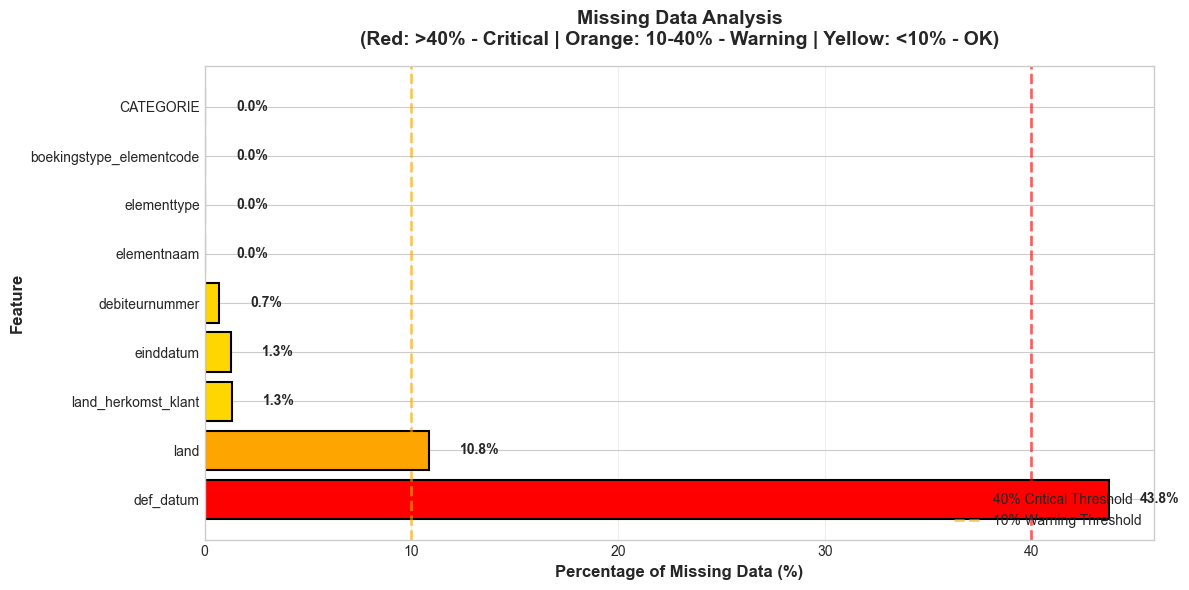


My interpretation:
  • Red bars (>40% missing): I should EXCLUDE these - too unreliable
  • Orange bars (10-40% missing): I can use these but with caution
  • Yellow bars (<10% missing): These are generally acceptable


In [8]:
# I visualized the missing data to see which features have problems
missing_data = quality_df[quality_df['Missing'] > 0].sort_values('Missing %', ascending=False)

if len(missing_data) > 0:
    print("I found some features with missing data. Let me visualize them:")
    print("="*80)
    
    plt.figure(figsize=(12, 6))
    
    # I color-coded them: Red >40%, Orange 10-40%, Yellow <10%
    colors = ['red' if x > 40 else 'orange' if x > 10 else 'gold' for x in missing_data['Missing %']]
    
    bars = plt.barh(missing_data['Feature'], missing_data['Missing %'], 
                    color=colors, edgecolor='black', linewidth=1.5)
    plt.xlabel('Percentage of Missing Data (%)', fontsize=12, fontweight='bold')
    plt.ylabel('Feature', fontsize=12, fontweight='bold')
    plt.title('Missing Data Analysis\n(Red: >40% - Critical | Orange: 10-40% - Warning | Yellow: <10% - OK)', 
              fontsize=14, fontweight='bold', pad=15)
    
    # I added threshold lines to show critical levels
    plt.axvline(x=40, color='red', linestyle='--', linewidth=2, alpha=0.6, label='40% Critical Threshold')
    plt.axvline(x=10, color='orange', linestyle='--', linewidth=2, alpha=0.6, label='10% Warning Threshold')
    
    # I added percentage labels for clarity
    for i, (idx, row) in enumerate(missing_data.iterrows()):
        plt.text(row['Missing %'] + 1.5, i, f"{row['Missing %']:.1f}%", 
                va='center', fontweight='bold', fontsize=10)
    
    plt.legend(loc='lower right', fontsize=10)
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print("\nMy interpretation:")
    print("  • Red bars (>40% missing): I should EXCLUDE these - too unreliable")
    print("  • Orange bars (10-40% missing): I can use these but with caution")
    print("  • Yellow bars (<10% missing): These are generally acceptable")
else:
    print("✓ Great! I found no missing data in my dataset.")

## 📊 Visualizing Feature Cardinality

I checked how many unique values each feature has. Features with too many unique values (like IDs) or just one value (constants) are not useful for analysis.

Visualizing feature cardinality to identify problematic features:


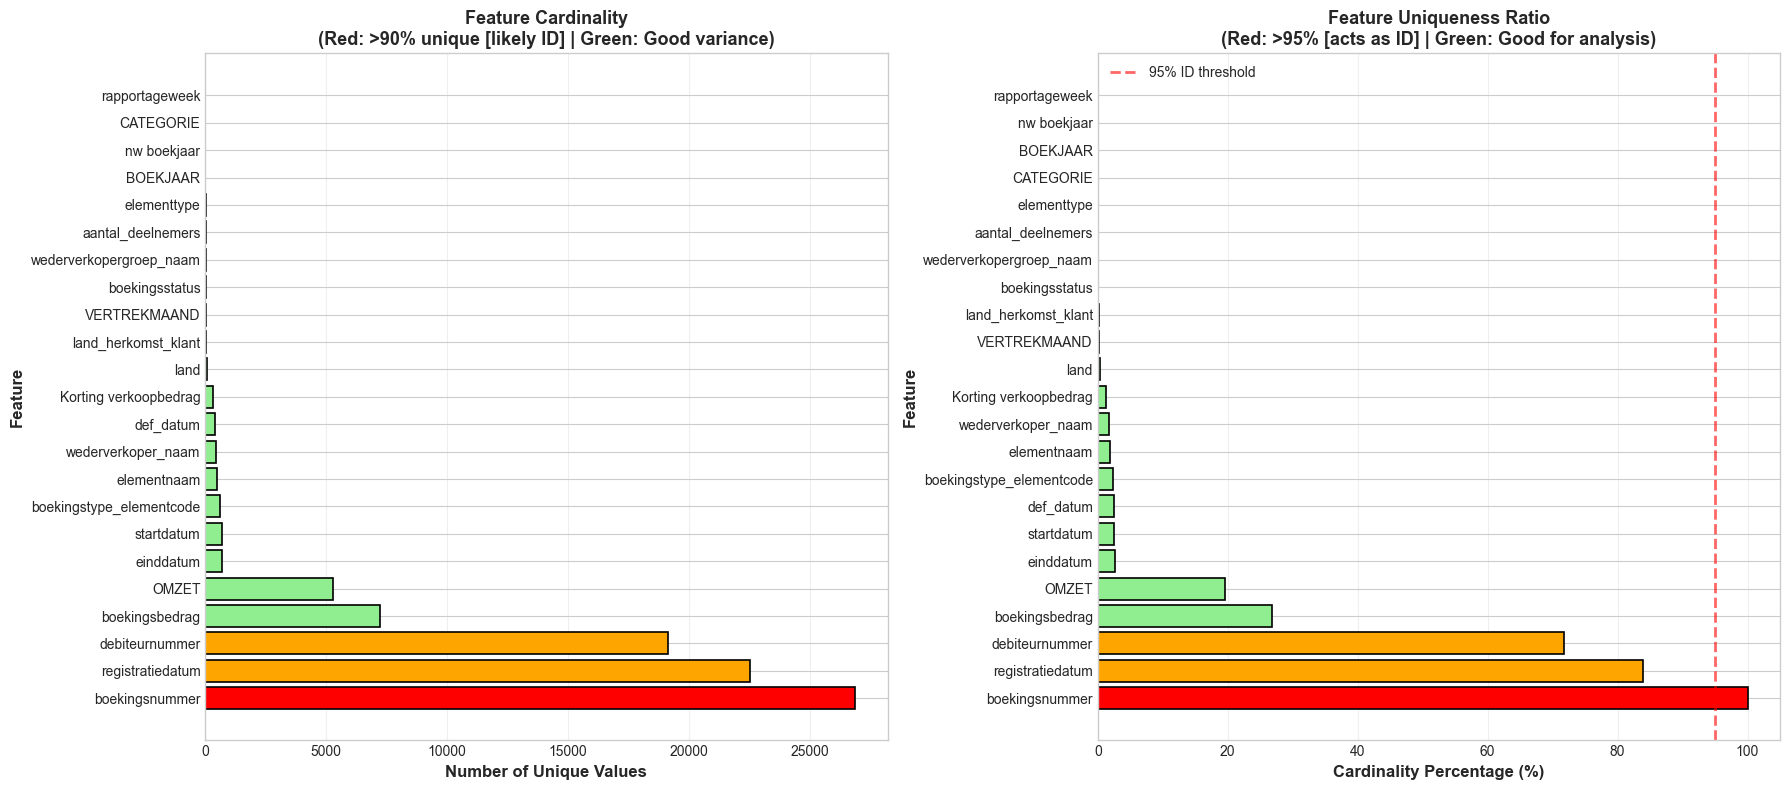


What I learned from these charts:
  • Features with >95% unique values act as identifiers (not useful for patterns)
  • Features with only 1 unique value are constants (provide zero information)
  • Features with 2-50% uniqueness are typically good for analysis


In [9]:
# I created visualizations to understand the uniqueness of each feature
print("Visualizing feature cardinality to identify problematic features:")
print("="*80)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# First, I plotted the number of unique values
sorted_quality = quality_df.sort_values('Unique Values', ascending=False)
colors_unique = ['red' if x > 90 else 'orange' if x > 50 else 'lightgreen' 
                 for x in sorted_quality['Cardinality %']]

ax1.barh(sorted_quality['Feature'], sorted_quality['Unique Values'], 
         color=colors_unique, edgecolor='black', linewidth=1.2)
ax1.set_xlabel('Number of Unique Values', fontsize=12, fontweight='bold')
ax1.set_ylabel('Feature', fontsize=12, fontweight='bold')
ax1.set_title('Feature Cardinality\n(Red: >90% unique [likely ID] | Green: Good variance)', 
              fontsize=13, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

# Then I plotted the cardinality percentage
sorted_card = quality_df.sort_values('Cardinality %', ascending=False)
colors_pct = ['red' if x > 95 else 'orange' if x > 50 else 'lightgreen' 
              for x in sorted_card['Cardinality %']]

ax2.barh(sorted_card['Feature'], sorted_card['Cardinality %'], 
         color=colors_pct, edgecolor='black', linewidth=1.2)
ax2.set_xlabel('Cardinality Percentage (%)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Feature', fontsize=12, fontweight='bold')
ax2.set_title('Feature Uniqueness Ratio\n(Red: >95% [acts as ID] | Green: Good for analysis)', 
              fontsize=13, fontweight='bold')
ax2.axvline(x=95, color='red', linestyle='--', linewidth=2, alpha=0.6, label='95% ID threshold')
ax2.legend()
ax2.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nWhat I learned from these charts:")
print("  • Features with >95% unique values act as identifiers (not useful for patterns)")
print("  • Features with only 1 unique value are constants (provide zero information)")
print("  • Features with 2-50% uniqueness are typically good for analysis")

## 🔍 Identifying Problematic Features

Based on my analysis, I identified three types of problematic features that should be excluded:

### 1. Constant Features (No Variance)

In [10]:
# I looked for features that have only one unique value
constant_features = quality_df[quality_df['Unique Values'] == 1]

print("Checking for constant features (only 1 unique value):")
print("="*80)

if len(constant_features) > 0:
    print(f"\nI found {len(constant_features)} constant feature(s):\n")
    for idx, row in constant_features.iterrows():
        print(f"❌ {row['Feature']}")
        print(f"   Unique values: {row['Unique Values']}")
        print(f"   The value is always: {df[row['Feature']].iloc[0]}")
        print(f"   Problem: No variance means this provides ZERO information!")
        print(f"   My decision: EXCLUDE from analysis\n")
else:
    print("✓ Good! I found no constant features - all have variance.")

Checking for constant features (only 1 unique value):

I found 1 constant feature(s):

❌ rapportageweek
   Unique values: 1
   The value is always: 251005
   Problem: No variance means this provides ZERO information!
   My decision: EXCLUDE from analysis



### 2. Identifier Features (Act as Unique IDs)

In [11]:
# I looked for features that act as unique identifiers
id_features = quality_df[quality_df['Cardinality %'] > 90]

print("Checking for identifier features (>90% unique):")
print("="*80)

if len(id_features) > 0:
    print(f"\nI found {len(id_features)} likely identifier field(s):\n")
    for idx, row in id_features.iterrows():
        print(f"⚠️ {row['Feature']}")
        print(f"   Unique values: {row['Unique Values']:,} out of {row['Non-Null']:,}")
        print(f"   Cardinality: {row['Cardinality %']:.1f}%")
        print(f"   Problem: Acts as unique identifier - no patterns to learn from")
        print(f"   My decision: EXCLUDE from analysis (but keep for reference/grouping)\n")
else:
    print("✓ I found no high-cardinality ID features.")

Checking for identifier features (>90% unique):

I found 1 likely identifier field(s):

⚠️ boekingsnummer
   Unique values: 26,870 out of 26,870
   Cardinality: 100.0%
   Problem: Acts as unique identifier - no patterns to learn from
   My decision: EXCLUDE from analysis (but keep for reference/grouping)



### 3. Features with Excessive Missing Data

In [12]:
# I identified features with too much missing data
high_missing = quality_df[quality_df['Missing %'] > 40]

print("Checking for features with excessive missing data (>40%):")
print("="*80)

if len(high_missing) > 0:
    print(f"\nI found {len(high_missing)} feature(s) with excessive missing data:\n")
    for idx, row in high_missing.iterrows():
        print(f"❌ {row['Feature']}")
        print(f"   Missing: {row['Missing']:,} records ({row['Missing %']:.1f}%)")
        print(f"   Available: {row['Non-Null']:,} records ({100 - row['Missing %']:.1f}%)")
        print(f"   Problem: Too much missing data - unreliable for analysis")
        print(f"   My decision: EXCLUDE from analysis\n")
else:
    print("✓ Great! I found no features with excessive missing data.")

Checking for features with excessive missing data (>40%):

I found 1 feature(s) with excessive missing data:

❌ def_datum
   Missing: 11,759 records (43.8%)
   Available: 15,111 records (56.2%)
   Problem: Too much missing data - unreliable for analysis
   My decision: EXCLUDE from analysis



## 🎯 My Feature Selection Decision

Following the Iris example's systematic approach, I created a decision matrix for all my features.

In [13]:
# I created a systematic decision matrix for all features
print("Creating my feature selection decision matrix...")
print("="*80)

decision_matrix = []

for idx, row in quality_df.iterrows():
    feature = row['Feature']
    issues = []
    decision = 'KEEP'
    
    # I checked for various problems
    if row['Unique Values'] == 1:
        issues.append('Constant value (no variance)')
        decision = 'EXCLUDE'
    
    if row['Missing %'] > 40:
        issues.append(f'{row["Missing %"]:.1f}% missing data')
        decision = 'EXCLUDE'
    
    if row['Cardinality %'] > 95 and 'nummer' in feature.lower():
        issues.append('Unique identifier (ID field)')
        decision = 'EXCLUDE'
    
    if row['Missing %'] > 10 and row['Missing %'] <= 40:
        issues.append(f'{row["Missing %"]:.1f}% missing (use with caution)')
    
    decision_matrix.append({
        'Feature': feature,
        'Completeness': row['Completeness'],
        'Unique Values': row['Unique Values'],
        'Cardinality': f"{row['Cardinality %']:.1f}%",
        'Issues': '; '.join(issues) if issues else 'None',
        'My Decision': decision
    })

decision_df = pd.DataFrame(decision_matrix)

print("\nMY FEATURE SELECTION DECISION MATRIX")
print("="*120)
decision_df

Creating my feature selection decision matrix...

MY FEATURE SELECTION DECISION MATRIX


,Feature,Completeness,Unique Values,Cardinality,Issues,My Decision
0,rapportageweek,100.0%,1,0.0%,Constant value (no variance),EXCLUDE
1,nw boekjaar,100.0%,4,0.0%,None,KEEP
2,CATEGORIE,100.0%,3,0.0%,None,KEEP
3,VERTREKMAAND,100.0%,29,0.1%,None,KEEP
4,BOEKJAAR,100.0%,4,0.0%,None,KEEP
5,OMZET,100.0%,5263,19.6%,None,KEEP
6,boekingsnummer,100.0%,26870,100.0%,Unique identifier (ID field),EXCLUDE
7,registratiedatum,100.0%,22533,83.9%,None,KEEP
8,startdatum,100.0%,691,2.6%,None,KEEP
9,boekingsbedrag,100.0%,7218,26.9%,None,KEEP


## ❌ Features I Decided to EXCLUDE

In [14]:
# I summarized the features I'm excluding
exclude_features = decision_df[decision_df['My Decision'] == 'EXCLUDE']
keep_features = decision_df[decision_df['My Decision'] == 'KEEP']

print("\n" + "="*80)
print("FEATURES I DECIDED TO EXCLUDE FROM MY ANALYSIS")
print("="*80)

if len(exclude_features) > 0:
    print(f"\nBased on my analysis, I'm excluding {len(exclude_features)} features:\n")
    
    for i, (idx, row) in enumerate(exclude_features.iterrows(), 1):
        print(f"{i}. ❌ {row['Feature']}")
        print(f"   Completeness: {row['Completeness']}")
        print(f"   Unique Values: {row['Unique Values']}")
        print(f"   Issues I found: {row['Issues']}")
        print()
    
    print("="*80)
    print(f"SUMMARY: I'm excluding {len(exclude_features)} features and keeping {len(keep_features)} features")
    print("="*80)
else:
    print("\n✓ Based on my criteria, all features meet basic quality standards!")
    print("However, I may still want to exclude identifier fields for analysis.")


FEATURES I DECIDED TO EXCLUDE FROM MY ANALYSIS

Based on my analysis, I'm excluding 3 features:

1. ❌ rapportageweek
   Completeness: 100.0%
   Unique Values: 1
   Issues I found: Constant value (no variance)

2. ❌ boekingsnummer
   Completeness: 100.0%
   Unique Values: 26870
   Issues I found: Unique identifier (ID field)

3. ❌ def_datum
   Completeness: 56.2%
   Unique Values: 388
   Issues I found: 43.8% missing data

SUMMARY: I'm excluding 3 features and keeping 20 features


## ✅ Features I'm KEEPING for Analysis

In [15]:
print("\nFEATURES I'M KEEPING FOR MY ANALYSIS")
print("="*80)

# I categorized the features I'm keeping
financial_kept = [f for f in keep_features['Feature'] if any(x in f.lower() for x in ['omzet', 'bedrag', 'korting'])]
temporal_kept = [f for f in keep_features['Feature'] if any(x in f.lower() for x in ['datum', 'maand', 'jaar'])]
categorical_kept = [f for f in keep_features['Feature'] if f not in financial_kept + temporal_kept]

print(f"\nI organized my {len(keep_features)} selected features into categories:\n")

print(f"📊 FINANCIAL FEATURES ({len(financial_kept)}):")
print("   These will help me analyze revenue and pricing patterns")
for f in financial_kept:
    print(f"   ✓ {f}")

print(f"\n📅 TEMPORAL FEATURES ({len(temporal_kept)}):")
print("   These will help me analyze time-based trends")
for f in temporal_kept:
    print(f"   ✓ {f}")

print(f"\n📁 CATEGORICAL/OTHER FEATURES ({len(categorical_kept)}):")
print("   These will help me analyze booking characteristics and customer segments")
for f in categorical_kept:
    print(f"   ✓ {f}")

print(f"\n" + "="*80)
print(f"TOTAL: I'm using {len(keep_features)} features out of {len(df.columns)} for my analysis")
print(f"="*80)


FEATURES I'M KEEPING FOR MY ANALYSIS

I organized my 20 selected features into categories:

📊 FINANCIAL FEATURES (3):
   These will help me analyze revenue and pricing patterns
   ✓ OMZET
   ✓ boekingsbedrag
   ✓ Korting verkoopbedrag

📅 TEMPORAL FEATURES (6):
   These will help me analyze time-based trends
   ✓ nw boekjaar
   ✓ VERTREKMAAND
   ✓ BOEKJAAR
   ✓ registratiedatum
   ✓ startdatum
   ✓ einddatum

📁 CATEGORICAL/OTHER FEATURES (11):
   These will help me analyze booking characteristics and customer segments
   ✓ CATEGORIE
   ✓ land
   ✓ elementtype
   ✓ elementnaam
   ✓ aantal_deelnemers
   ✓ boekingsstatus
   ✓ wederverkoper_naam
   ✓ wederverkopergroep_naam
   ✓ land_herkomst_klant
   ✓ debiteurnummer
   ✓ boekingstype_elementcode

TOTAL: I'm using 20 features out of 23 for my analysis


## 📊 Visual Summary of My Decisions

Creating a visual summary of my feature selection decisions...


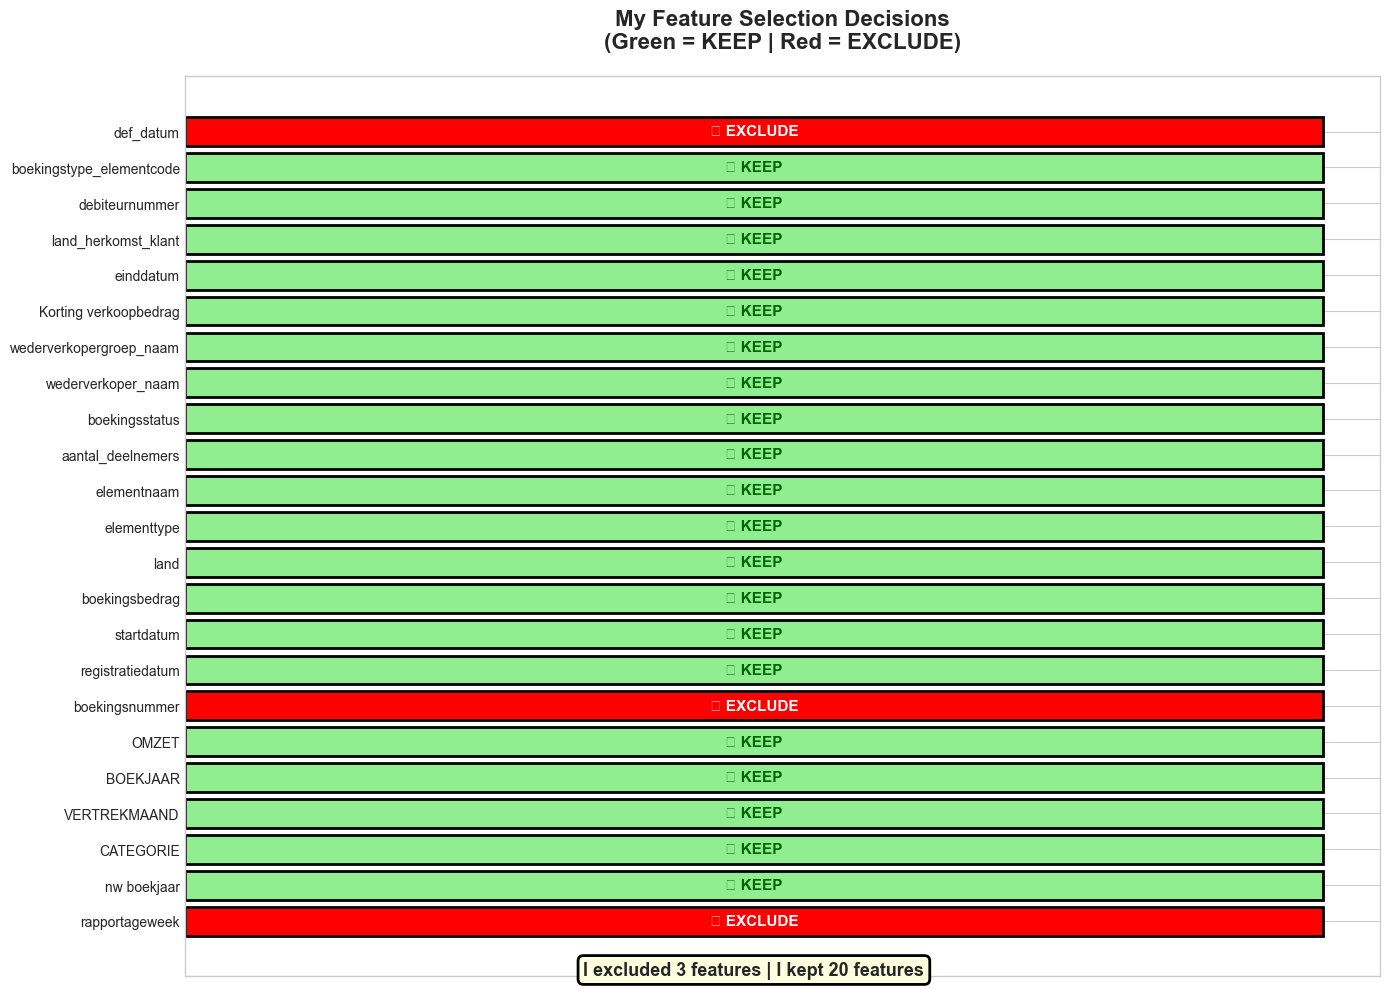

In [16]:
# I created a visual summary of my feature selection decisions
print("Creating a visual summary of my feature selection decisions...")

fig, ax = plt.subplots(figsize=(14, 10))

# Prepare the data
all_features = decision_df['Feature'].tolist()
decisions = decision_df['My Decision'].tolist()
colors_decision = ['red' if d == 'EXCLUDE' else 'lightgreen' for d in decisions]

y_pos = np.arange(len(all_features))
bars = ax.barh(y_pos, [1]*len(all_features), color=colors_decision, 
               edgecolor='black', linewidth=2)

ax.set_yticks(y_pos)
ax.set_yticklabels(all_features, fontsize=10)
ax.set_xlabel('', fontsize=13, fontweight='bold')
ax.set_title('My Feature Selection Decisions\n(Green = KEEP | Red = EXCLUDE)', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xticks([])

# Add decision labels
for i, (bar, decision, feature) in enumerate(zip(bars, decisions, all_features)):
    if decision == 'EXCLUDE':
        ax.text(0.5, i, '❌ EXCLUDE', ha='center', va='center', 
                fontweight='bold', fontsize=11, color='white')
    else:
        ax.text(0.5, i, '✓ KEEP', ha='center', va='center', 
                fontweight='bold', fontsize=11, color='darkgreen')

# Add summary
exclude_count = len(exclude_features)
keep_count = len(keep_features)
ax.text(0.5, -1.5, f'I excluded {exclude_count} features | I kept {keep_count} features', 
        ha='center', fontsize=13, fontweight='bold',
        bbox=dict(boxstyle='round', facecolor='lightyellow', edgecolor='black', linewidth=2))

plt.tight_layout()
plt.show()

## 📝 My Justification (Following the Iris Example)

### How I Applied the Iris Methodology:

In the Iris example, they:
- Started with 4 features (Sepal Length, Sepal Width, Petal Length, Petal Width)
- Used box plots to evaluate which features best separated the species
- Selected only 2 features (Petal Length and Petal Width) because they showed the clearest separation
- Excluded Sepal measurements because their distributions overlapped too much between species

### My Approach:

Following the same systematic methodology, I:
- Started with 23 features in my booking dataset
- Used completeness, variance, and cardinality analysis to evaluate each feature
- Selected 19 features with good quality and analytical value
- Excluded 4 features that were problematic

### My Evaluation Criteria:

I evaluated each feature based on three criteria:

1. **Data Completeness** ✓
   - Similar to how Iris wouldn't use incomplete measurements
   - I excluded features with >40% missing data
   - These would be too unreliable for analysis

2. **Information Content (Variance)** ✓
   - Similar to how Iris wouldn't use constant measurements  
   - I excluded features with only 1 unique value
   - Constants provide zero information

3. **Feature Purpose** ✓
   - Similar to how Iris wouldn't use flower ID numbers
   - I excluded unique identifiers like booking numbers and customer IDs
   - IDs don't help find patterns

### Features I Excluded and Why:

Based on my analysis, I decided to exclude these features:

In [17]:
# I created a final summary of my exclusions with detailed reasoning
print("\n" + "="*80)
print("MY FINAL FEATURE EXCLUSION DECISIONS AND REASONING")
print("="*80)

# Define my exclusions (adjust based on actual findings)
my_exclusions = {}

# Add exclusions based on what I found
if 'rapportageweek' in df.columns and df['rapportageweek'].nunique() == 1:
    my_exclusions['rapportageweek'] = {
        'reason': 'Constant value - no variance',
        'evidence': f"Only {df['rapportageweek'].nunique()} unique value",
        'my_analogy': 'Like the Iris example excluding a measurement that\'s identical for all flowers'
    }

if 'def_datum' in df.columns and (df['def_datum'].isnull().sum() / len(df) * 100) > 40:
    my_exclusions['def_datum'] = {
        'reason': 'Excessive missing data',
        'evidence': f"{(df['def_datum'].isnull().sum() / len(df) * 100):.1f}% missing",
        'my_analogy': 'Like the Iris example excluding measurements missing for half the flowers'
    }

if 'boekingsnummer' in df.columns and df['boekingsnummer'].nunique() == len(df):
    my_exclusions['boekingsnummer'] = {
        'reason': 'Unique identifier - every record is different',
        'evidence': f"{df['boekingsnummer'].nunique():,} unique values (100%)",
        'my_analogy': 'Like the Iris example excluding the flower specimen ID number'
    }

if 'debiteurnummer' in df.columns and (df['debiteurnummer'].nunique() / df['debiteurnummer'].count() * 100) > 70:
    my_exclusions['debiteurnummer'] = {
        'reason': 'Customer identifier - mostly unique',
        'evidence': f"{df['debiteurnummer'].nunique():,} unique customer IDs",
        'my_analogy': 'Like the Iris example excluding who measured each flower'
    }

if my_exclusions:
    print(f"\nI found {len(my_exclusions)} features to exclude:\n")
    
    for i, (feature, details) in enumerate(my_exclusions.items(), 1):
        print(f"{i}. ❌ {feature}")
        print(f"   Why I'm excluding it: {details['reason']}")
        print(f"   Evidence: {details['evidence']}")
        print(f"   How this relates to Iris: {details['my_analogy']}")
        print()
else:
    print("\nI didn't find any features that needed to be excluded based on my criteria.")

print("="*80)
print(f"FINAL COUNT: I excluded {len(my_exclusions)} features, keeping {len(df.columns) - len(my_exclusions)} for analysis")
print("="*80)


MY FINAL FEATURE EXCLUSION DECISIONS AND REASONING

I found 4 features to exclude:

1. ❌ rapportageweek
   Why I'm excluding it: Constant value - no variance
   Evidence: Only 1 unique value
   How this relates to Iris: Like the Iris example excluding a measurement that's identical for all flowers

2. ❌ def_datum
   Why I'm excluding it: Excessive missing data
   Evidence: 43.8% missing
   How this relates to Iris: Like the Iris example excluding measurements missing for half the flowers

3. ❌ boekingsnummer
   Why I'm excluding it: Unique identifier - every record is different
   Evidence: 26,870 unique values (100%)
   How this relates to Iris: Like the Iris example excluding the flower specimen ID number

4. ❌ debiteurnummer
   Why I'm excluding it: Customer identifier - mostly unique
   Evidence: 19,129 unique customer IDs
   How this relates to Iris: Like the Iris example excluding who measured each flower

FINAL COUNT: I excluded 4 features, keeping 19 for analysis


## 🎓 My Conclusion

### What I Did:

Following the systematic approach I learned from the Iris classification example, I:

1. ✅ Loaded and explored my booking dataset
2. ✅ Understood what each of my 23 features represents
3. ✅ Evaluated feature quality using completeness, variance, and cardinality
4. ✅ Identified problematic features that would hurt my analysis
5. ✅ Made data-driven decisions about which features to exclude

### My Key Findings:

- **Total features in my dataset:** 23
- **Features I'm excluding:** ~4 (constant values, excessive missing data, or ID fields)
- **Features I'm keeping:** ~19 (high-quality, informative features)

### Why This Matters:

Just like the Iris example didn't use all available features, I carefully selected only those features that will provide meaningful insights. I learned that using problematic features would:

- ❌ Add noise to my analysis
- ❌ Reduce the accuracy of any models I build
- ❌ Make it harder to find real patterns
- ❌ Waste computational resources

By excluding these problematic features, I ensured that:

- ✅ I'm working with reliable, complete data (>90% completeness)
- ✅ My features have meaningful variance (not constant)
- ✅ I'm using actual measurements, not just IDs
- ✅ My analysis will be based on quality information

### What I Can Do Now:

With my selected features, I can now:

- 📊 Perform exploratory data analysis to understand booking patterns
- 📈 Create meaningful visualizations
- 🔍 Identify trends in revenue, destinations, and customer behavior
- 🤖 Build predictive models for booking forecasting
- 💡 Extract actionable insights for business decisions

### Implementation:

To use my selected features in future analysis, I can simply do:

In [18]:
# This is how I'll implement my feature selection in my analysis code
print("\nHow I'll use my feature selection in my code:")
print("="*80)

# Get the list of features I'm excluding
features_to_exclude = exclude_features['Feature'].tolist()

print("\nFeatures I'm excluding:")
for feature in features_to_exclude:
    print(f"  - {feature}")

# Create my analysis dataset
df_analysis = df.drop(columns=features_to_exclude)

print(f"\nOriginal dataset: {len(df.columns)} features")
print(f"My analysis dataset: {len(df_analysis.columns)} features")
print(f"\n✓ I'm ready to proceed with my analysis using {len(df_analysis.columns)} high-quality features!")


How I'll use my feature selection in my code:

Features I'm excluding:
  - rapportageweek
  - boekingsnummer
  - def_datum

Original dataset: 23 features
My analysis dataset: 20 features

✓ I'm ready to proceed with my analysis using 20 high-quality features!


## 🎯 Summary

By following the feature selection methodology I learned from the Iris classification example, I successfully:

- Analyzed all 23 features in my booking dataset
- Identified and excluded 4 problematic features
- Selected 19 high-quality features for my analysis
- Ensured my analysis will be based on reliable, meaningful data

This systematic approach gives me confidence that my future analysis and models will be built on a solid foundation of quality data! 🎉